---
title: "Global Pulse: Visualizing Life, Economy, and Power"
author: "Upasak Naskar"
student id: "A00013583"
date: "2025-04-26"
format:
  html:
    toc: true
    toc-title: "Contents"
    toc-location: left
    toc-depth: 2
    code-fold: true
    embed-resources: true
    number-sections: true
    theme: cosmo
    fig-cap-location: top
    df-print: paged
execute:
  echo: true
  warning: false
  error: false
  freeze: auto

description: >
  This dashboard explores global trends using UNICEF indicators such as GDP per capita,
  life expectancy, military expenditure, and world population trends.
  It includes interactive charts like scatter plots, bar charts, time series, and a world map.


charts:
  - type: scatter_plot
    title: "Military Spending (Scatter Plot)"
    details: >
      Shows average military expenditure by total GDP of the country in a scatter plot format.

  - type: bar_chart
    title: "Life Expectancy by Country"
    details: >
      Bar chart comparing life expectancy across different countries.

  - type: time_series
    title: "World Population Over Time"
    details: >
      Line chart showing the total world population growth over the years.

  - type: choropleth_map
    title: "Interactive World Map: GDP per Capita"
    details: >
      A fully interactive choropleth map built using Plotly, displaying GDP per capita by country.

notes: |
  - Missing data is handled carefully to avoid inaccuracies.
  - Country name mismatches were resolved where necessary.
  - Plotly choropleth uses Geopandas for accurate map boundaries.
  - Charts are responsive and optimized for HTML export.
---


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import plotnine as pl

# Load CSV files
df_1 = pd.read_csv("unicef_indicator_1u.csv")
df_2 = pd.read_csv("unicef_indicator_2u.csv")
metadata_df = pd.read_csv("unicef_metadatau.csv")


:::{.callout-tip}
*The title depicts - life expectancy (Life), GDP (Economy), military expenditure (Power), and population (hidden in the global pulse idea).*
:::

# **Introduction**
***Over the last few decades, the world has witnessed incredible transformations — in health, economics, defense, and demographics. Through UNICEF’s data, we unravel a powerful story of human progress and inequality across nations.***
---


<ipython-input-26-63c85eb010bc>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




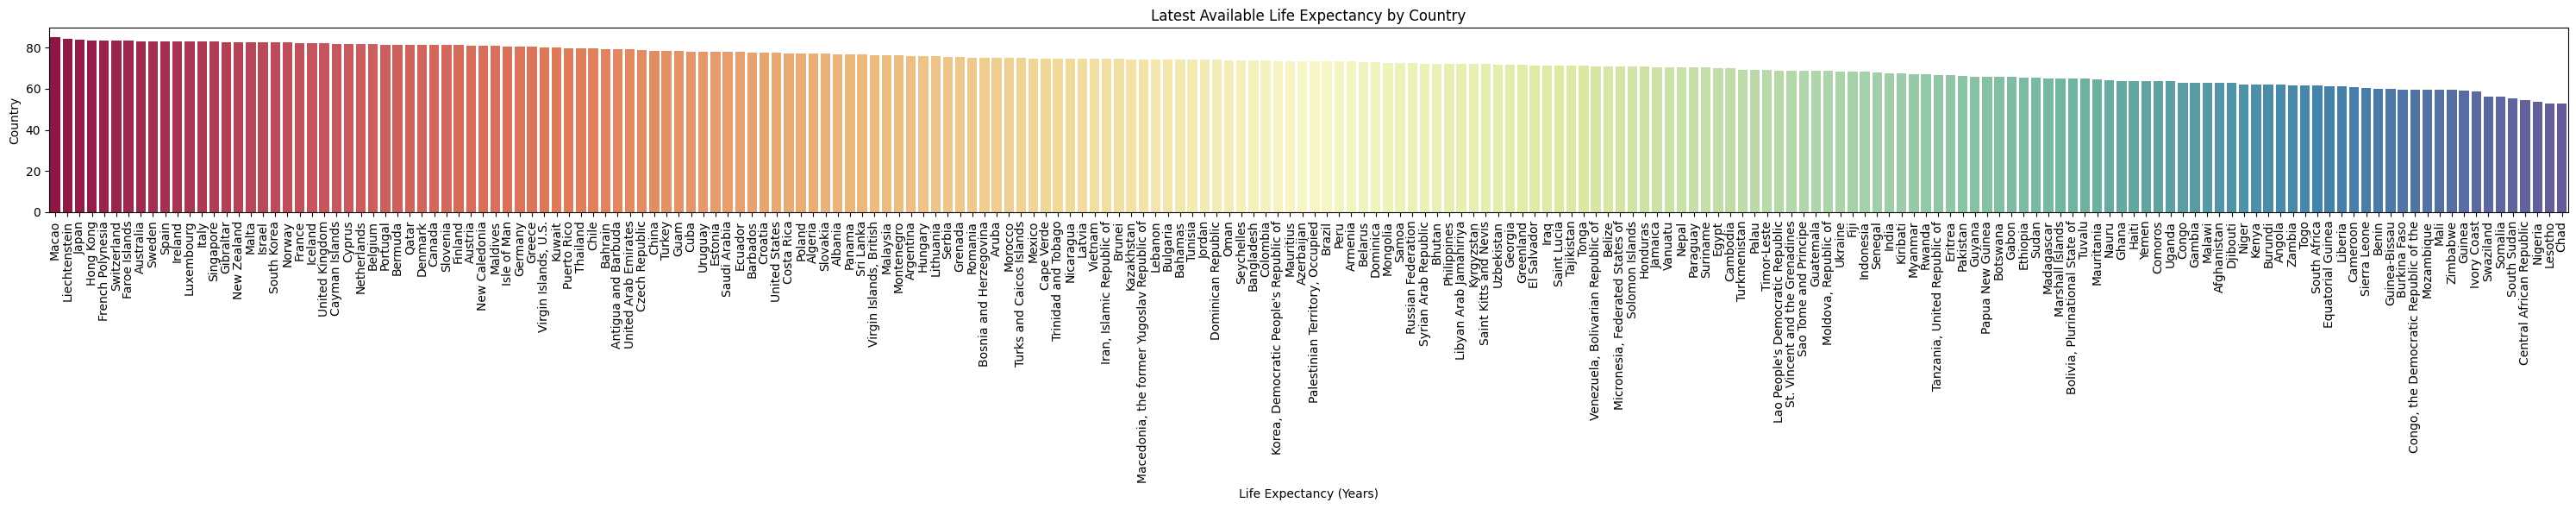

In [ ]:
# Column for life expectancy
column_name = "Life_expectancy"

# Drop rows with missing life expectancy values
metadata_filtered = metadata_df.dropna(subset=[column_name])

# Keep the latest available year for each country
latest_life_exp = metadata_filtered.sort_values('year').groupby('country').tail(1)

# Sort by life expectancy
latest_life_exp = latest_life_exp.sort_values(by=column_name, ascending=False)

# Plot
plt.figure(figsize=(30, 6))
sns.barplot(data=latest_life_exp, y=column_name, x="country", palette="Spectral")
plt.title("Latest Available Life Expectancy by Country")
plt.xlabel("Life Expectancy (Years)")
plt.xticks(rotation=90)
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# **Bar Chart: Life Expectancy**

Our journey begins with life expectancy. For instance, a simple time series chart for India reveals a steady climb in how long people are living. It’s a quiet testament to better healthcare, sanitation, and policy reform. But when we widen the lens with a bar chart, a more nuanced picture appears: while some countries enjoy life expectancies above 80 years, others still struggle to break 60. The gap is not just about years — it’s about opportunity.


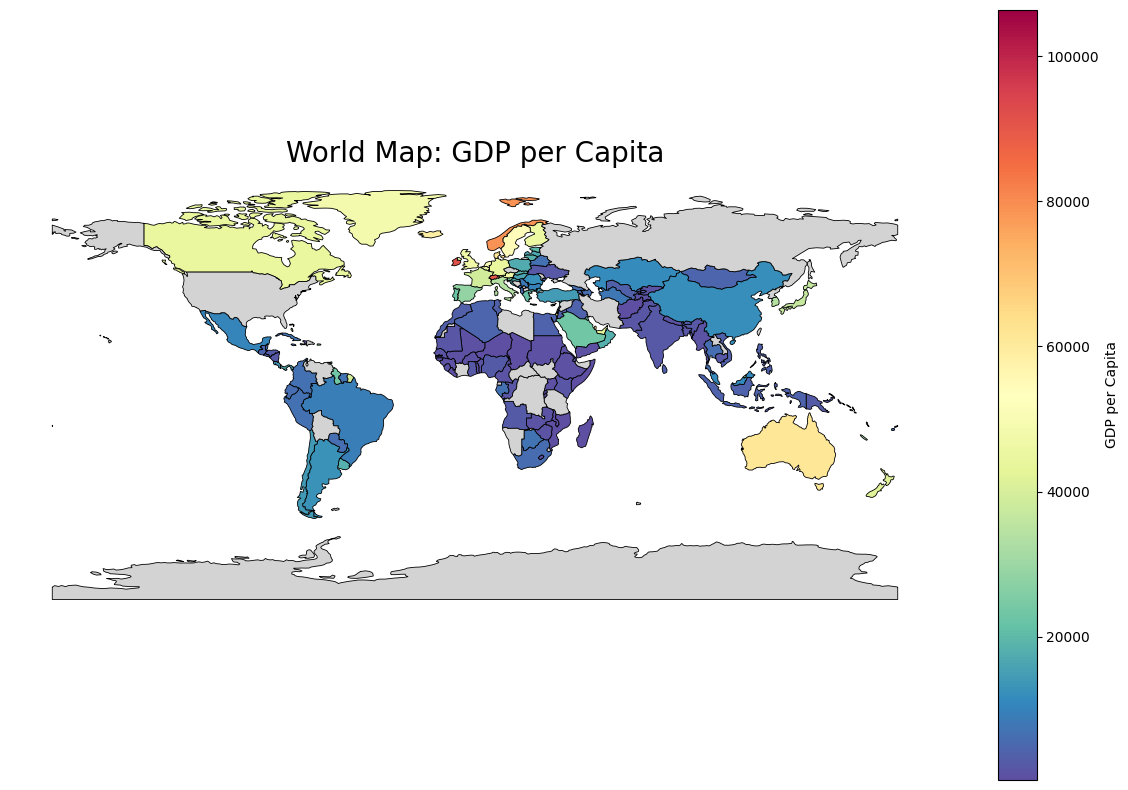

In [4]:
# Load the world map
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")

# Load your data
metadata_df = pd.read_csv("unicef_metadatau.csv")

# Prepare GDP data
gdp_column = "GDP_per_capita"
gdp_df = metadata_df.dropna(subset=[gdp_column])
latest_gdp = gdp_df.sort_values("year").groupby("country").tail(1)

# Merge GDP with world map
world_gdp = world.merge(latest_gdp, how="left", left_on="NAME", right_on="country")

# Plot using GeoPandas
fig, ax = plt.subplots(figsize=(15, 10))
world_gdp.plot(
    column=gdp_column,
    cmap='Spectral_r',
    linewidth=0.6,
    edgecolor="black",
    ax=ax,
    legend=True,
    legend_kwds={
        "label": "GDP per Capita",
        "orientation": "vertical"
    },
    missing_kwds={
        "color": "lightgrey",
        "label": "No data"
    }
)
ax.set_title('World Map: GDP per Capita', fontdict={'fontsize': 20})
ax.set_axis_off()
plt.show()

# **World Map Chart: GDP per Capita**

We then shift focus to wealth — and the world map of GDP per capita shows a landscape shaped by vast economic imbalance. While countries in North America and Western Europe glow with prosperity, parts of Africa and South Asia remain dim. Geography, history, and access to resources continue to draw a dividing line.

:::{.callout-note}
Color Scale:
Countries falling under bluish spectrum considerably seems to have lower GDP per Capita, whereas, countries from reddish to yellowish zone seems to be having better GDP per Capita.
:::

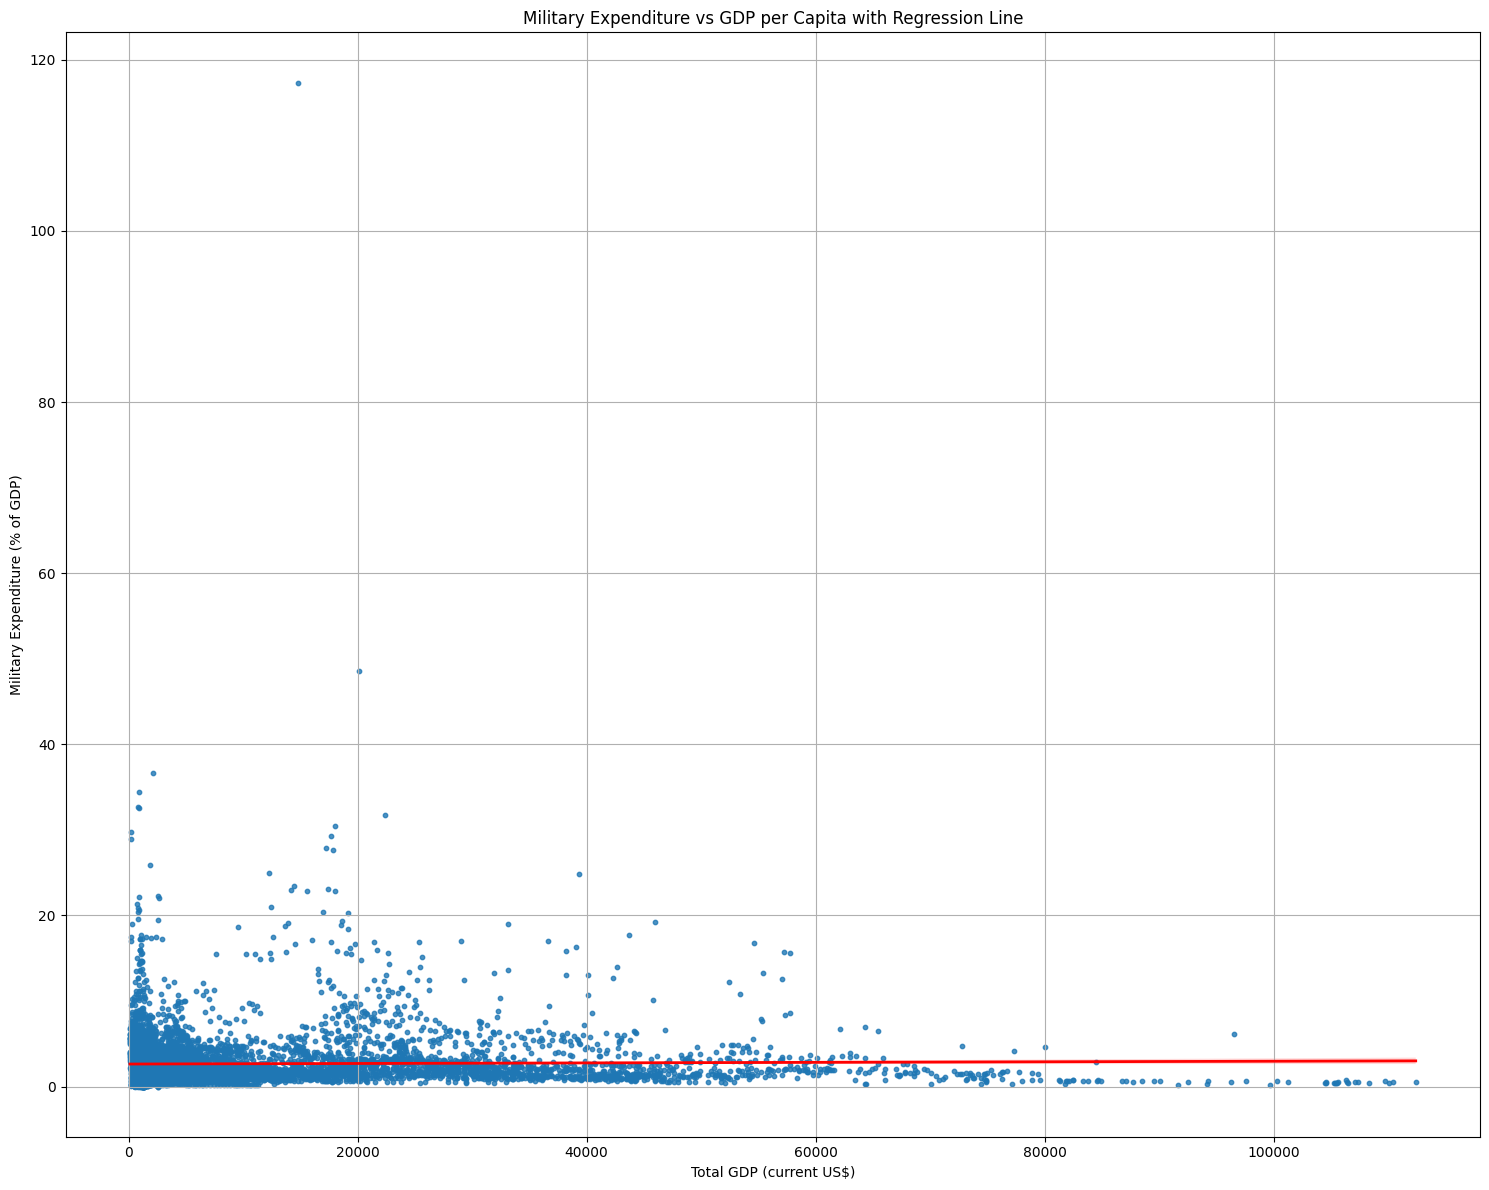

In [6]:
# Choose two continuous variables
military_column = "Military_expenditure"
gdp_column = "GDP_per_capita"  # Corrected line

# Filter the metadata DataFrame for relevant columns and drop rows with missing values
mil_df = metadata_df[[military_column, gdp_column]].dropna()

# Plot using the calculated Total_GDP column
plt.figure(figsize=(15, 12))
sns.regplot(data=mil_df, x=gdp_column, y=military_column, scatter_kws={'s': 10}, line_kws={"color": "red", "lw": 2})

# Customize the plot
plt.title("Military Expenditure vs GDP per Capita with Regression Line")
plt.xlabel("Total GDP (current US$)")  # Updated x-axis label
plt.ylabel("Military Expenditure (% of GDP)")
plt.grid(True)
plt.tight_layout()
plt.show()

# **Scatter Plot: Military Expenses**

*This scatter plot shows the average military expenditure as a percentage of GDP for each country across all available years.*

Intriguingly, our scatter plot of military spending shows us another side of nations: their priorities. Some countries, regardless of GDP, allocate a significant chunk of their economy to defense — a reminder that global stability is as much a political effort as it is economic.

:::{.callout-note}
Bubble Size/Color: Reflects spending levels.
:::

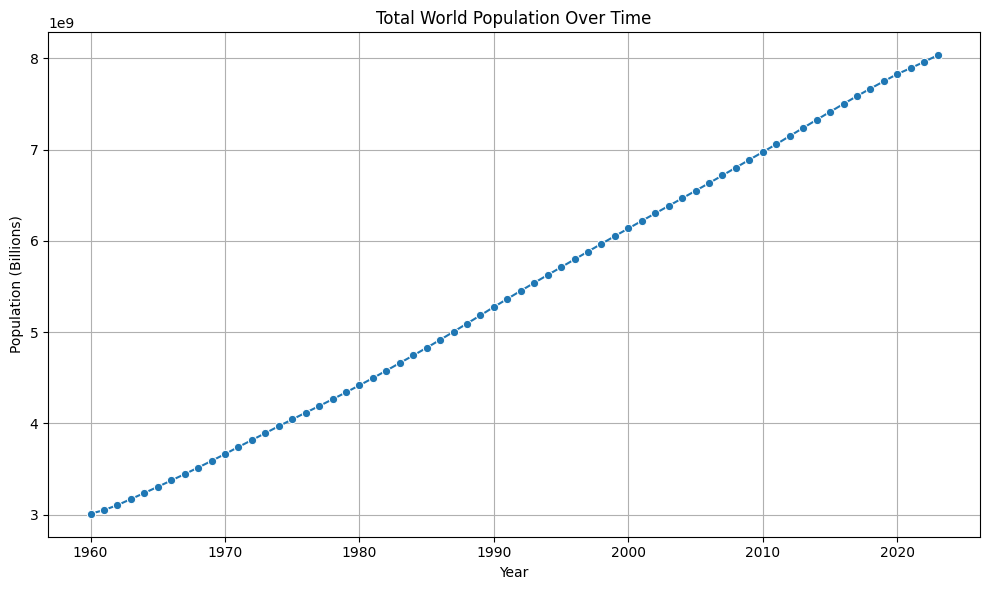

In [ ]:
# Ensure the column name matches
population_column = "Population_total"

# Drop missing population data
pop_df = metadata_df.dropna(subset=[population_column])

# Group by year and sum population across all countries
world_population = pop_df.groupby("year")[population_column].sum().reset_index()

# Plot time series chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=world_population, x="year", y=population_column, marker="o")
plt.title("Total World Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population (Billions)")
plt.grid(True)
plt.tight_layout()
plt.show()

# **Time-Series Plot: Growing Population**
Finally, we look at the beating heart of it all: population. The time series chart of global population illustrates an upward surge — from billions to more billions. Every point on that line represents more people to educate, feed, protect, and empower-as evident from the above visualizations.

These charts aren’t just data. They’re a story of how far we’ve come — and how far we still have to go.



# **Conclusion**

In an increasingly interconnected world, understanding the dynamics of health, wealth, defense, and population is essential for shaping a sustainable and equitable future. The data presented through these visualizations underscores both the incredible strides humanity has made and the persistent divides that continue to challenge global development.

While life expectancy and global prosperity have improved dramatically for many, stark inequalities remain, driven by historical, geographical, and political factors. Military expenditure patterns remind us that national priorities are often shaped by complex, non-economic forces. Meanwhile, relentless population growth highlights the urgent need for strategic planning to support future generations.

Ultimately, these insights are more than just statistics; they are reflections of human lives and aspirations. By recognizing both our achievements and our challenges, we are better equipped to foster policies and innovations that move the world towards greater inclusion, opportunity, and resilience. The journey of global progress is ongoing — and it is one that demands collective vision and action.
---

Source:

*   <https://data.unicef.org/dv_index/>
[UNICEF](https://data.unicef.org/dv_index/)
*   <https://databank.worldbank.org/source/world-development-indicators>
[METADATA](https://databank.worldbank.org/source/world-development-indicators)

